In [1]:
%pip install pandas
%pip install influxdb
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


---
## Inicialización


Importamos las librerías que necesitaremos

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


---
## Exploración y tratamiento de los datos


In [3]:
df = pd.read_csv("data/KEU2A21_to_KW40.csv")
df

C:\Users\t32p1tx\AppData\Local\Temp\1\ipykernel_16052\1543821001.py:1: DtypeWarning: Columns (2,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/KEU2A21_to_KW40.csv")


,Unnamed: 0,result,table,_start,_stop,_time,_value,_field,_measurement
0,NaN,_result,0,2024-09-01T00:00:00Z,2024-09-30T20:33:23.826336718Z,2024-09-22T10:25:55.074652275Z,0,122110RB1_FB_SEAT_STAT.122110RB1.N_NOK,KEU2A21-----BS1---KFU1
1,NaN,_result,1,2024-09-01T00:00:00Z,2024-09-30T20:33:23.826336718Z,2024-09-22T10:25:55.074650463Z,15,122110RB1_FB_SEAT_STAT.122110RB1.N_OK,KEU2A21-----BS1---KFU1
2,NaN,_result,1,2024-09-01T00:00:00Z,2024-09-30T20:33:23.826336718Z,2024-09-23T02:38:29.758467912Z,16,122110RB1_FB_SEAT_STAT.122110RB1.N_OK,KEU2A21-----BS1---KFU1
3,NaN,_result,1,2024-09-01T00:00:00Z,2024-09-30T20:33:23.826336718Z,2024-09-23T02:39:49.747209686Z,17,122110RB1_FB_SEAT_STAT.122110RB1.N_OK,KEU2A21-----BS1---KFU1
4,NaN,_result,1,2024-09-01T00:00:00Z,2024-09-30T20:33:23.826336718Z,2024-09-23T02:41:09.752913148Z,18,122110RB1_FB_SEAT_STAT.122110RB1.N_OK,KEU2A21-----BS1---KFU1
...,...,...,...,...,...,...,...,...,...
3809858,NaN,_result,50,2024-09-01T00:00:00Z,2024-09-30T20:33:23.826336718Z,2024-09-30T19:44:56.600146058Z,302.5087890625,122110RB1_FB_SEAT_STAT.122110RB1.T_Paro_No_Pro...,KEU2A21-----BS1---KFU1
3809859,NaN,_result,50,2024-09-01T00:00:00Z,2024-09-30T20:33:23.826336718Z,2024-09-30T19:44:57.607892185Z,302.525390625,122110RB1_FB_SEAT_STAT.122110RB1.T_Paro_No_Pro...,KEU2A21-----BS1---KFU1
3809860,NaN,_result,50,2024-09-01T00:00:00Z,2024-09-30T20:33:23.826336718Z,2024-09-30T19:44:58.603313602Z,302.5419921875,122110RB1_FB_SEAT_STAT.122110RB1.T_Paro_No_Pro...,KEU2A21-----BS1---KFU1
3809861,NaN,result,table,_start,_stop,_time,_value,_field,_measurement


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3809863 entries, 0 to 3809862
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    float64
 1   result        object 
 2   table         object 
 3   _start        object 
 4   _stop         object 
 5   _time         object 
 6   _value        object 
 7   _field        object 
 8   _measurement  object 
dtypes: float64(1), object(8)
memory usage: 261.6+ MB


Nos quedamos en nuestro dataset con las columnas que nos interesan, en este caso son las columnas de timestamp, valor, y la variable.
Ahora tenemos un dataset de dimensionalidad muy pequeña debido a que todos los datos están distribuidos en diferentes timestamp. Ahora deberemos organizarlos para tener diferentes instantes de tiempo y generar una columna por variable, de modo que obtengamos el estado de la máquina y de su eficiencia global a lo largo del tiempo

In [5]:
df = df[['_time','_value','_field']]
df = df.dropna()
df

,_time,_value,_field
0,2024-09-22T10:25:55.074652275Z,0,122110RB1_FB_SEAT_STAT.122110RB1.N_NOK
1,2024-09-22T10:25:55.074650463Z,15,122110RB1_FB_SEAT_STAT.122110RB1.N_OK
2,2024-09-23T02:38:29.758467912Z,16,122110RB1_FB_SEAT_STAT.122110RB1.N_OK
3,2024-09-23T02:39:49.747209686Z,17,122110RB1_FB_SEAT_STAT.122110RB1.N_OK
4,2024-09-23T02:41:09.752913148Z,18,122110RB1_FB_SEAT_STAT.122110RB1.N_OK
...,...,...,...
3809858,2024-09-30T19:44:56.600146058Z,302.5087890625,122110RB1_FB_SEAT_STAT.122110RB1.T_Paro_No_Pro...
3809859,2024-09-30T19:44:57.607892185Z,302.525390625,122110RB1_FB_SEAT_STAT.122110RB1.T_Paro_No_Pro...
3809860,2024-09-30T19:44:58.603313602Z,302.5419921875,122110RB1_FB_SEAT_STAT.122110RB1.T_Paro_No_Pro...
3809861,_time,_value,_field


### Conversión del dataset

Como hemos comentado anteriormente, nos toca hacer resample de pandas para gestionar las series de tiempo que se nos originan debido a la arquitectura/definición de nuestra aplicación

In [6]:
# Convertir la columna '_time' a tipo datetime
df['_time'] = pd.to_datetime(df['_time'], errors='coerce')

# Eliminar las filas donde haya tenido un error de conversión de tiempo (_time)
# Esto lo debo hacer debido a que al aplicar el 'coerce' puedo obtener NaT o NaN al encontrarse Pandas un valor que no sea capaz de convertir
df = df.dropna(subset=['_time'])

# Buscar filas duplicadas basadas en '_time' y '_field'
# y conservar solo la última entrada para cada combinación
df = df.drop_duplicates(subset=['_time', '_field'], keep='last')

# Pivotar el DataFrame para tener una columna por cada '_field'
df_pivot = df.pivot(index='_time', columns='_field', values='_value')

# Rellenar los valores NaN con el último valor válido
df_filled = df_pivot.fillna(method='ffill')

# Agrupar por segundos y consolidar en una única fila por segundo
# Aquí usamos el primer valor no nulo (se puede ajustar según lo necesites)
df_resampled = df_filled.resample('1S').first()

# Guardar el DataFrame agrupado a un archivo CSV
df_resampled.to_csv('data/KEU2A21_to_KW40_grouped.csv', index=True)

print("Datos resampleados y guardados en 'data/KEU2A21_to_KW40_grouped.csv'.")


Datos resampleados y guardados en 'data/KEU2A21_to_KW40_grouped.csv'.


Guardamos el dataset en un csv y seguimos analizando nuestro dataframe ahora resampleado

In [7]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 727649 entries, 2024-09-22 10:25:55+00:00 to 2024-09-30 20:33:23+00:00
Freq: S
Data columns (total 52 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   122110RB1_FB_SEAT_STAT.122110RB1.N_NOK                   722395 non-null  object 
 1   122110RB1_FB_SEAT_STAT.122110RB1.N_OK                    722395 non-null  object 
 2   122110RB1_FB_SEAT_STAT.122110RB1.N_PAUSA                 722395 non-null  object 
 3   122110RB1_FB_SEAT_STAT.122110RB1.N_PROD                  722395 non-null  object 
 4   122110RB1_FB_SEAT_STAT.122110RB1.N_SOLL                  722395 non-null  object 
 5   122110RB1_FB_SEAT_STAT.122110RB1.N_TREND                 722395 non-null  object 
 6   122110RB1_FB_SEAT_STAT.122110RB1.POR_Calidad             722395 non-null  object 
 7   122110RB1_FB_SEAT_STAT.122110RB1.POR_D_TECNICA 

Vemos la distribución de nuestro dataset y rápidamente nos damos cuenta como la misma tiene coherencia, debido a que hemos formado 52 columnas que corresponden a las variables que teníamos en nuestro bloque de datos del PLC
Por otro lado, se observa como hay valores faltantes, cerca de unos 5.000, debido a que el valor de valores no nulos es menor al del tamanyo del dataset. Vamos a tratarlos...

### Valores nulos

In [8]:
df_resampled.isnull().sum()

_field
122110RB1_FB_SEAT_STAT.122110RB1.N_NOK                     5254
122110RB1_FB_SEAT_STAT.122110RB1.N_OK                      5254
122110RB1_FB_SEAT_STAT.122110RB1.N_PAUSA                   5254
122110RB1_FB_SEAT_STAT.122110RB1.N_PROD                    5254
122110RB1_FB_SEAT_STAT.122110RB1.N_SOLL                    5254
122110RB1_FB_SEAT_STAT.122110RB1.N_TREND                   5254
122110RB1_FB_SEAT_STAT.122110RB1.POR_Calidad               5254
122110RB1_FB_SEAT_STAT.122110RB1.POR_D_TECNICA             5254
122110RB1_FB_SEAT_STAT.122110RB1.POR_Disponibilidad        5254
122110RB1_FB_SEAT_STAT.122110RB1.POR_OEE                   5254
122110RB1_FB_SEAT_STAT.122110RB1.POR_Rendimiento           5254
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Calidad             5254
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Disponibilidad      5254
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Eficiencia          5254
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_OEE                 5254
122110RB1_FB_SEAT_STAT.122110RB1.

Como se puede observar, obtenemos un total de 5.254.
Revisando el dataset, se observan que son filas completamente vacias, por lo que se decide suprimir estas.
Ademas, el porcentaje respecto al total de filas es muy bajo, por lo que no nos repercute

In [9]:
df_oee = df_resampled.dropna()
print(df_oee.info())
print(df_oee.isnull())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 722395 entries, 2024-09-22 10:25:55+00:00 to 2024-09-30 20:33:23+00:00
Data columns (total 52 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   122110RB1_FB_SEAT_STAT.122110RB1.N_NOK                   722395 non-null  object 
 1   122110RB1_FB_SEAT_STAT.122110RB1.N_OK                    722395 non-null  object 
 2   122110RB1_FB_SEAT_STAT.122110RB1.N_PAUSA                 722395 non-null  object 
 3   122110RB1_FB_SEAT_STAT.122110RB1.N_PROD                  722395 non-null  object 
 4   122110RB1_FB_SEAT_STAT.122110RB1.N_SOLL                  722395 non-null  object 
 5   122110RB1_FB_SEAT_STAT.122110RB1.N_TREND                 722395 non-null  object 
 6   122110RB1_FB_SEAT_STAT.122110RB1.POR_Calidad             722395 non-null  object 
 7   122110RB1_FB_SEAT_STAT.122110RB1.POR_D_TECNICA         

Ahora podemos garantizar que el dataset no tiene valores faltantes debido a que su tamanyo y el de valores no nulos coincide

In [10]:
df_oee.dtypes

_field
122110RB1_FB_SEAT_STAT.122110RB1.N_NOK                      object
122110RB1_FB_SEAT_STAT.122110RB1.N_OK                       object
122110RB1_FB_SEAT_STAT.122110RB1.N_PAUSA                    object
122110RB1_FB_SEAT_STAT.122110RB1.N_PROD                     object
122110RB1_FB_SEAT_STAT.122110RB1.N_SOLL                     object
122110RB1_FB_SEAT_STAT.122110RB1.N_TREND                    object
122110RB1_FB_SEAT_STAT.122110RB1.POR_Calidad                object
122110RB1_FB_SEAT_STAT.122110RB1.POR_D_TECNICA              object
122110RB1_FB_SEAT_STAT.122110RB1.POR_Disponibilidad        float64
122110RB1_FB_SEAT_STAT.122110RB1.POR_OEE                   float64
122110RB1_FB_SEAT_STAT.122110RB1.POR_Rendimiento            object
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Calidad              object
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Disponibilidad       object
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Eficiencia           object
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_OEE             

Viendo la distribución de tipo de datos, de forma automatica, python nos ha asignado tipos de datos que no coinciden con la realidad
Ahora vamos a tratar de convertir estos valores para que así podamos asegurar que en el futuro no tengamos problemas de conversión, análisis, procesado, etc

In [11]:
# Modifico los tipos de datos de las columnas según la definición del bloque de datos del PLC

# Mapeo de columnas a sus tipos de datos
type_mapping = {
    '122110RB1_FB_SEAT_STAT.122110RB1.N_NOK': 'int',
    '122110RB1_FB_SEAT_STAT.122110RB1.N_OK': 'int',
    '122110RB1_FB_SEAT_STAT.122110RB1.N_PAUSA': 'int',
    '122110RB1_FB_SEAT_STAT.122110RB1.N_PROD': 'int',
    '122110RB1_FB_SEAT_STAT.122110RB1.N_SOLL': 'int',
    '122110RB1_FB_SEAT_STAT.122110RB1.N_TREND': 'int',
    '122110RB1_FB_SEAT_STAT.122110RB1.POR_Calidad': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.POR_D_TECNICA': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.POR_Disponibilidad': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.POR_OEE': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.POR_Rendimiento': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Calidad': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Disponibilidad': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Eficiencia': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_OEE': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_SOLL': 'int',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_Stoe_Calidad': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_Stoe_Disponibilidad': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_Stoe_Eficiencia': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_Stoe_OEE': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_TC_OBJ': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_Warn_Calidad': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_Warn_Disponibilidad': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_Warn_Eficiencia': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_Warn_OEE': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.ST_Averia': 'bool',
    '122110RB1_FB_SEAT_STAT.122110RB1.ST_EnCiclo_CO': 'bool',
    '122110RB1_FB_SEAT_STAT.122110RB1.ST_IN_LOG_IN': 'bool',
    '122110RB1_FB_SEAT_STAT.122110RB1.ST_IN_LOG_OUT': 'bool',
    '122110RB1_FB_SEAT_STAT.122110RB1.ST_Instal_en_BREAK': 'bool',
    '122110RB1_FB_SEAT_STAT.122110RB1.ST_Instal_en_PAUSA': 'bool',
    '122110RB1_FB_SEAT_STAT.122110RB1.ST_Instal_en_seq': 'bool',
    '122110RB1_FB_SEAT_STAT.122110RB1.Status_W_Stoe': 'int',
    '122110RB1_FB_SEAT_STAT.122110RB1.Stoe': 'bool',
    '122110RB1_FB_SEAT_STAT.122110RB1.StrARG': 'str',
    '122110RB1_FB_SEAT_STAT.122110RB1.StrInstalación': 'str',
    '122110RB1_FB_SEAT_STAT.122110RB1.StrPlataforma': 'str',
    '122110RB1_FB_SEAT_STAT.122110RB1.StrSubzona': 'str',
    '122110RB1_FB_SEAT_STAT.122110RB1.T_Averia_ACT': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.T_Averia_ACU': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.T_Ciclo_ACT': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.T_Ciclo_Logistico': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.T_Ciclo_Medio': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.T_LOG_IN_ACT': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.T_LOG_IN_ACU': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.T_LOG_OUT_ACT': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.T_LOG_OUT_ACU': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.T_Mem_Ciclo_Ant': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.T_Neto': 'float',  
    '122110RB1_FB_SEAT_STAT.122110RB1.T_Neto_Disponible': 'float',  
    '122110RB1_FB_SEAT_STAT.122110RB1.T_Paro_No_Programado': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.Version_FB': 'str',
}

# Actualizar tipos de datos en el DataFrame
for column, dtype in type_mapping.items():
    if column in df_oee.columns:
        try:
            df_oee[column] = df_oee[column].astype(dtype)
        except ValueError:
            print(f"Error al convertir la columna {column} a {dtype}")

# Verifica los tipos de datos después de la conversión
print(df_oee.dtypes)


C:\Users\t32p1tx\AppData\Local\Temp\1\ipykernel_16052\1593188576.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oee[column] = df_oee[column].astype(dtype)
C:\Users\t32p1tx\AppData\Local\Temp\1\ipykernel_16052\1593188576.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oee[column] = df_oee[column].astype(dtype)
C:\Users\t32p1tx\AppData\Local\Temp\1\ipykernel_16052\1593188576.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

_field
122110RB1_FB_SEAT_STAT.122110RB1.N_NOK                       int32
122110RB1_FB_SEAT_STAT.122110RB1.N_OK                        int32
122110RB1_FB_SEAT_STAT.122110RB1.N_PAUSA                     int32
122110RB1_FB_SEAT_STAT.122110RB1.N_PROD                      int32
122110RB1_FB_SEAT_STAT.122110RB1.N_SOLL                      int32
122110RB1_FB_SEAT_STAT.122110RB1.N_TREND                     int32
122110RB1_FB_SEAT_STAT.122110RB1.POR_Calidad               float64
122110RB1_FB_SEAT_STAT.122110RB1.POR_D_TECNICA             float64
122110RB1_FB_SEAT_STAT.122110RB1.POR_Disponibilidad        float64
122110RB1_FB_SEAT_STAT.122110RB1.POR_OEE                   float64
122110RB1_FB_SEAT_STAT.122110RB1.POR_Rendimiento           float64
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Calidad             float64
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Disponibilidad      float64
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Eficiencia          float64
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_OEE             

C:\Users\t32p1tx\AppData\Local\Temp\1\ipykernel_16052\1593188576.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oee[column] = df_oee[column].astype(dtype)
C:\Users\t32p1tx\AppData\Local\Temp\1\ipykernel_16052\1593188576.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oee[column] = df_oee[column].astype(dtype)
C:\Users\t32p1tx\AppData\Local\Temp\1\ipykernel_16052\1593188576.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

### Descripción del nuevo dataset

Seguimos obteniendo más información respecto a nuestro dataset a través de la instrucción .info() de pandas, la cual nos arroja información muy relevante relacionada con la estadística descriptiva de nuestro problema

In [17]:
# Eliminar el prefijo de las columnas en df_oee
df_oee.columns = df_oee.columns.str.replace(r'^122110RB1_FB_SEAT_STAT\.122110RB1\.', '', regex=True)
# Esto me permitira visualizar mejor los datos

df_oee.describe()

_field,N_NOK,N_OK,N_PAUSA,N_PROD,N_SOLL,N_TREND,POR_Calidad,POR_D_TECNICA,POR_Disponibilidad,POR_OEE,...,T_Ciclo_Logistico,T_Ciclo_Medio,T_LOG_IN_ACT,T_LOG_IN_ACU,T_LOG_OUT_ACT,T_LOG_OUT_ACU,T_Mem_Ciclo_Ant,T_Neto,T_Neto_Disponible,T_Paro_No_Programado
count,722395.0,722395.000000,722395.0,722395.000000,722395.0,722395.000000,722395.0,722395.000000,722395.000000,722395.000000,...,722395.000000,722395.000000,722395.000000,722395.000000,722395.000000,722395.000000,722395.000000,722395.000000,722395.0,722395.000000
mean,0.0,40.996881,0.0,40.996881,118.0,214.444239,100.0,96.329509,45.078241,28.769037,...,17.078432,2.022358,5.843646,10.752422,183.081643,258.223775,1.465802,171.107406,0.0,289.696211
std,0.0,44.026039,0.0,44.026039,0.0,179.815361,0.0,3.715320,16.500104,17.421590,...,45.631935,1.948914,12.912243,19.569366,283.153147,290.261470,1.472761,82.916159,0.0,266.457301
min,0.0,0.000000,0.0,0.000000,118.0,-794.000000,100.0,78.468201,0.094994,0.094368,...,1.448065,1.009277,0.000488,0.000488,0.000244,0.000977,0.959961,1.276855,0.0,0.676758
25%,0.0,0.000000,0.0,0.000000,118.0,186.000000,100.0,94.391655,32.958733,5.822749,...,3.131491,1.294147,0.023926,0.186035,0.751953,72.111816,1.263428,122.404785,0.0,98.877930
50%,0.0,21.000000,0.0,21.000000,118.0,273.000000,100.0,97.558853,44.149681,32.000618,...,3.999923,1.337717,0.075928,0.401367,29.832764,148.161133,1.267578,177.452148,0.0,207.447266
75%,0.0,82.000000,0.0,82.000000,118.0,328.000000,100.0,98.954620,58.152332,40.875204,...,21.982932,1.593295,0.091309,4.747070,287.067261,322.638367,1.410645,214.461914,0.0,340.566406
max,0.0,134.000000,0.0,134.000000,118.0,328.000000,100.0,99.999794,93.675980,88.393852,...,1356.393555,8.373262,114.339844,114.754883,1353.568359,1435.983398,50.227539,329.981934,0.0,1435.983398


Esta herramienta es especialmente útil, nos permite conocer como se ha distribuido nuestra data y sacar conclusiones sin tener un contexto o conocer realmente la instalación real
- **POR_Disponibilidad**: 
  - **Media**: 45.08% - Muestra que el equipo tiene una disponibilidad moderada.
  - **Mínimo**: 0.09% - Puede indicar períodos de inactividad extrema.
  - **Máximo**: 93.68% - Refleja momentos en que el equipo estuvo casi siempre disponible.

- **POR_OEE**: 
  - **Media**: 28.77% - Un porcentaje bajo sugiere que la eficiencia global del equipo necesita mejoras.
  - **Mínimo**: 0.09% - Indica momentos críticos de ineficiencia.
  - **Máximo**: 88.39% - Refleja el mejor desempeño observado.

- **T_Ciclo_ACT**: 
  - **Media**: 2.38 - Indica un ciclo actual relativamente corto.
  - **Mínimo**: 0.00024 - Puede señalar un ciclo anómalo.
  - **Máximo**: 127.00 - Refleja un ciclo excepcionalmente largo.

- **T_Ciclo_Logistico**: 
  - **Media**: 17.08 - Un tiempo logístico razonable, aunque se puede optimizar.
  - **Máximo**: 1356.39 - Podría indicar ineficiencias en el flujo logístico.

- **T_Ciclo_Medio**: 
  - **Media**: 2.02 - Sugerente de un buen tiempo medio de ciclo.
  - **Máximo**: 8.37 - Muestra que hay espacio para mejorar la eficiencia.

- **T_LOG_IN_ACT**: 
  - **Media**: 5.84 - Un tiempo logístico de entrada aceptable.

- **T_LOG_OUT_ACT**: 
  - **Media**: 10.75 - Refleja un tiempo logístico de salida que puede ser mejorado.

- **T_Mem_Ciclo_Ant**: 
  - **Media**: 1.47 - Indica que el tiempo de ciclo anterior fue significativamente menor, lo que podría sugerir ineficiencia actual.


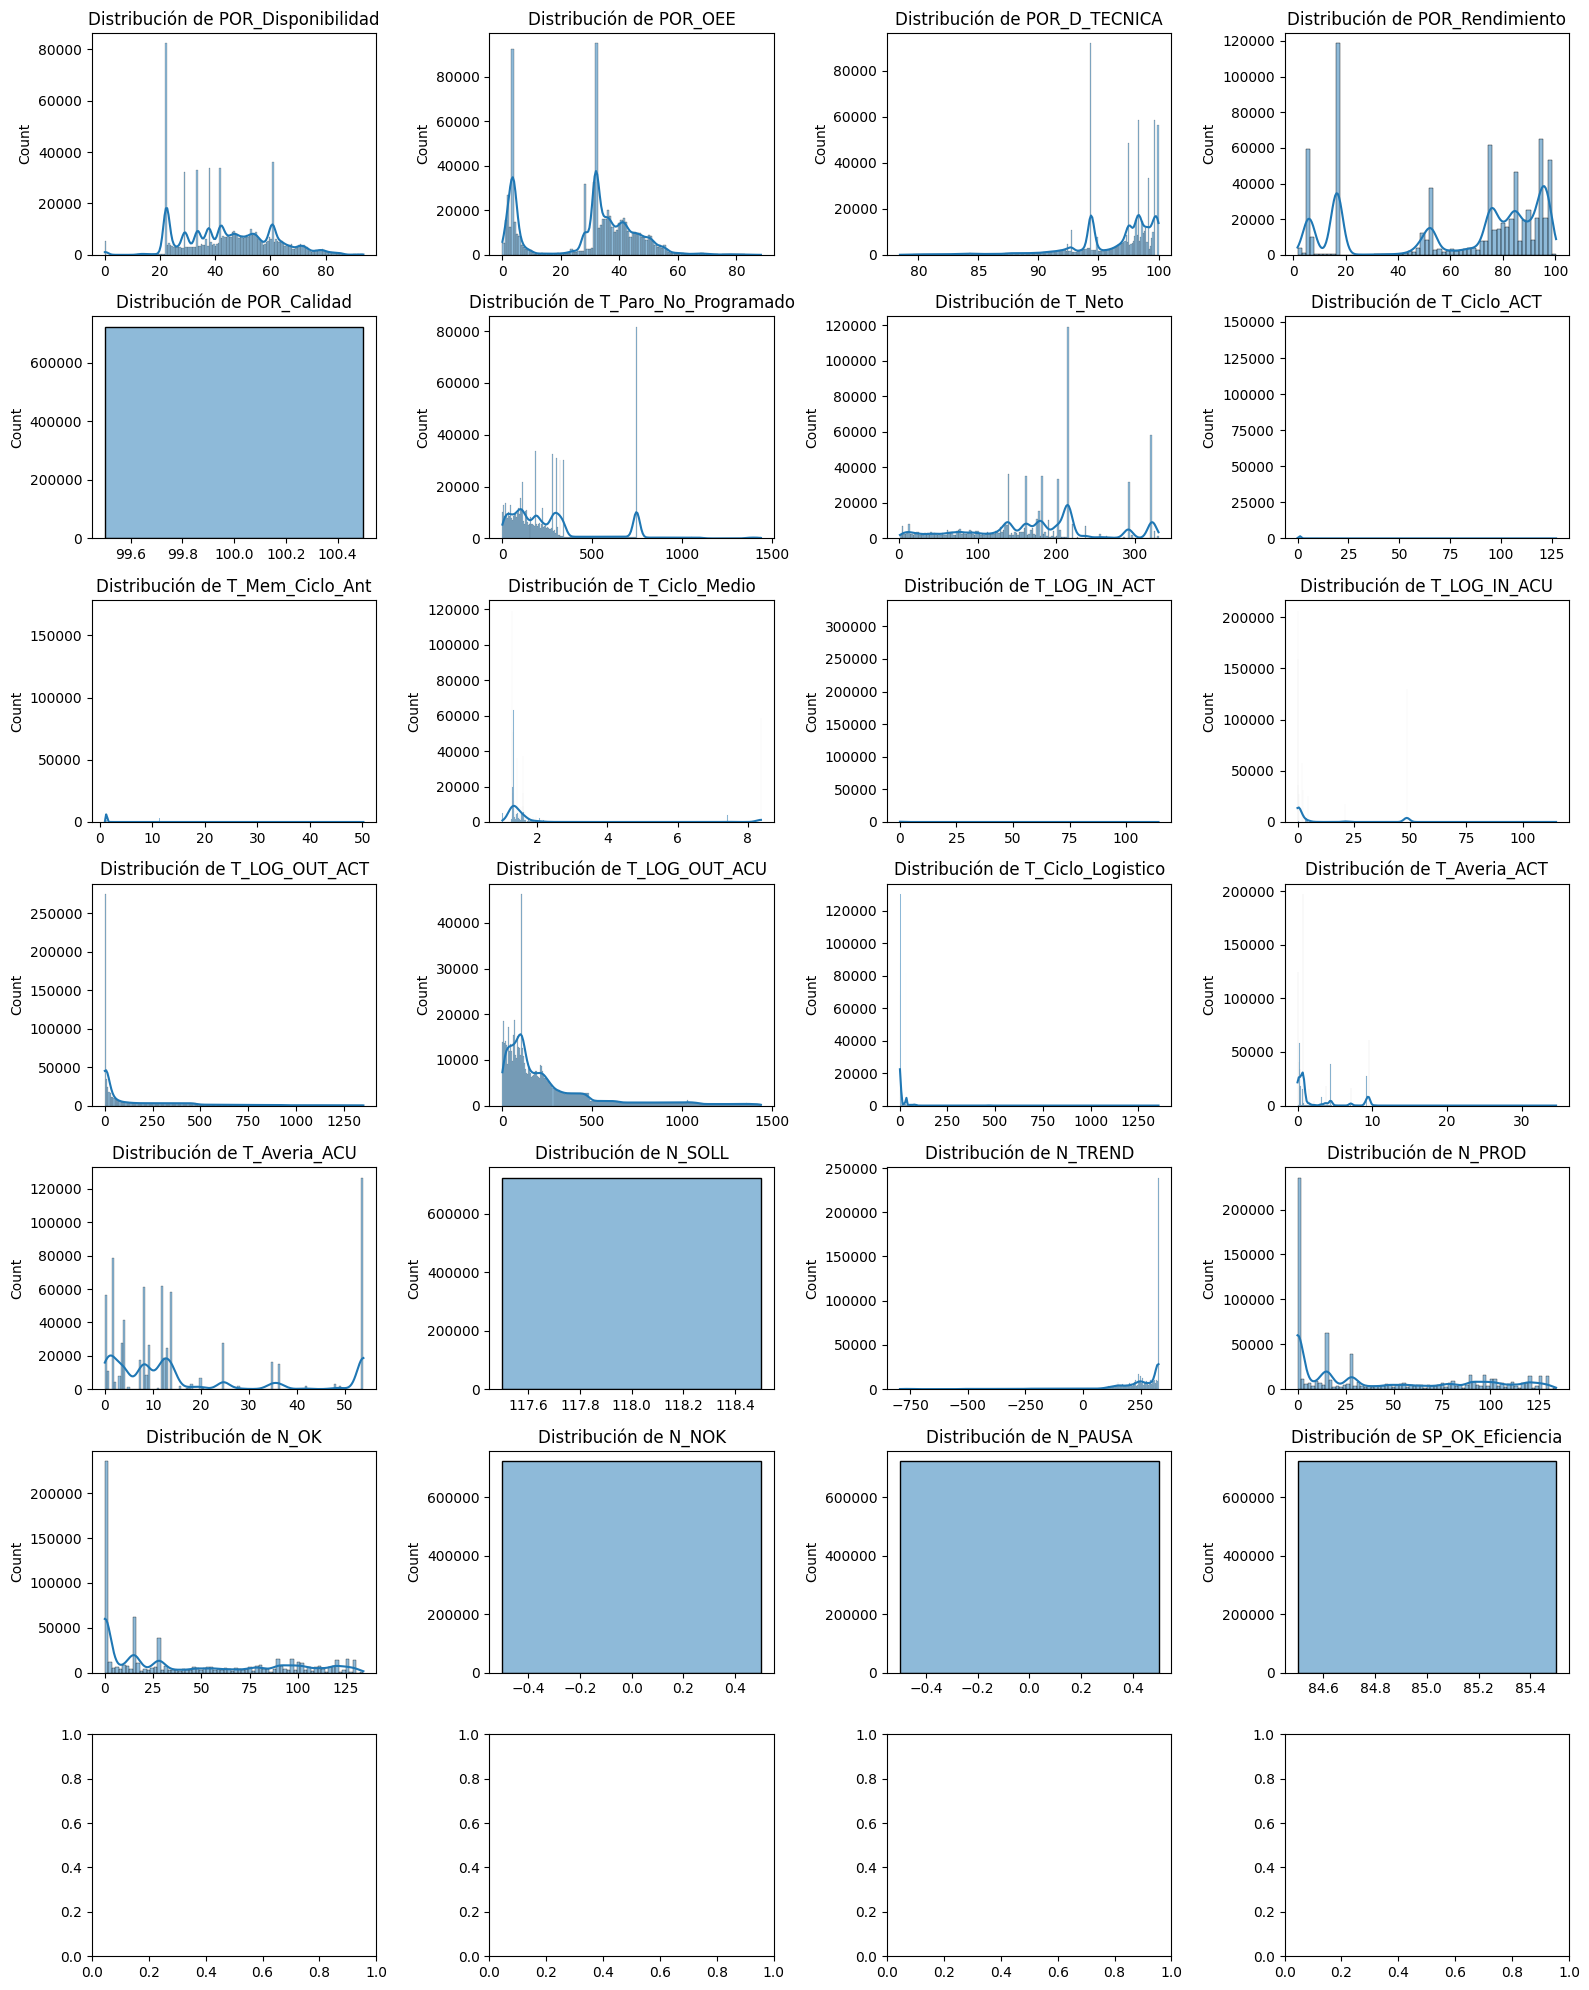

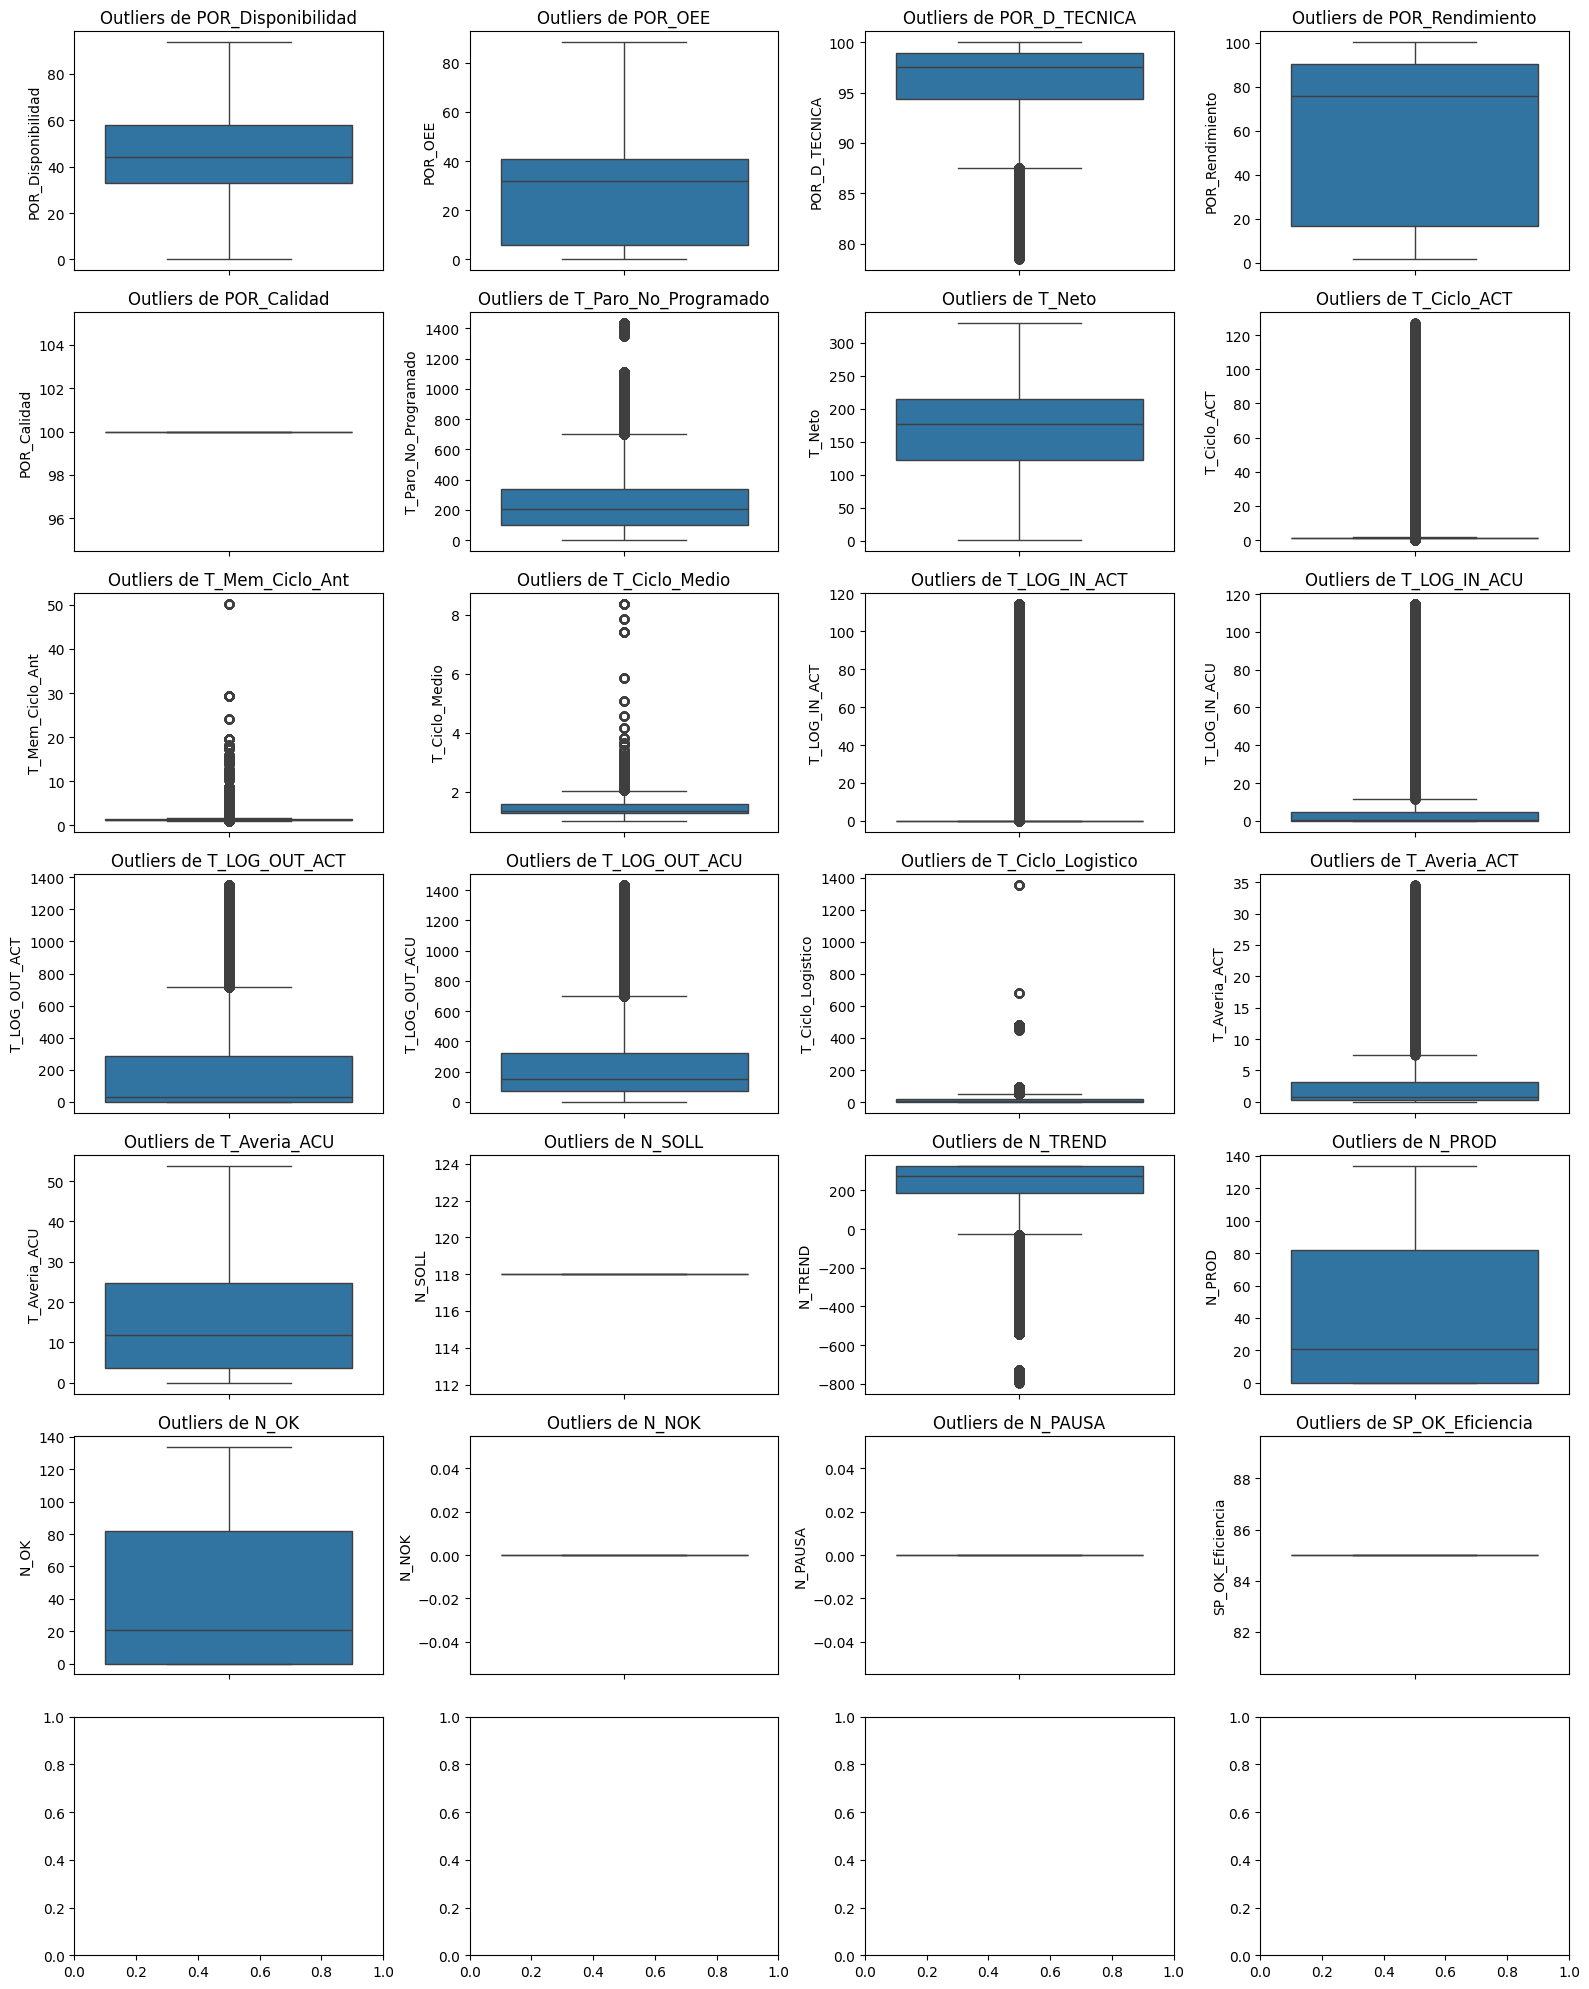

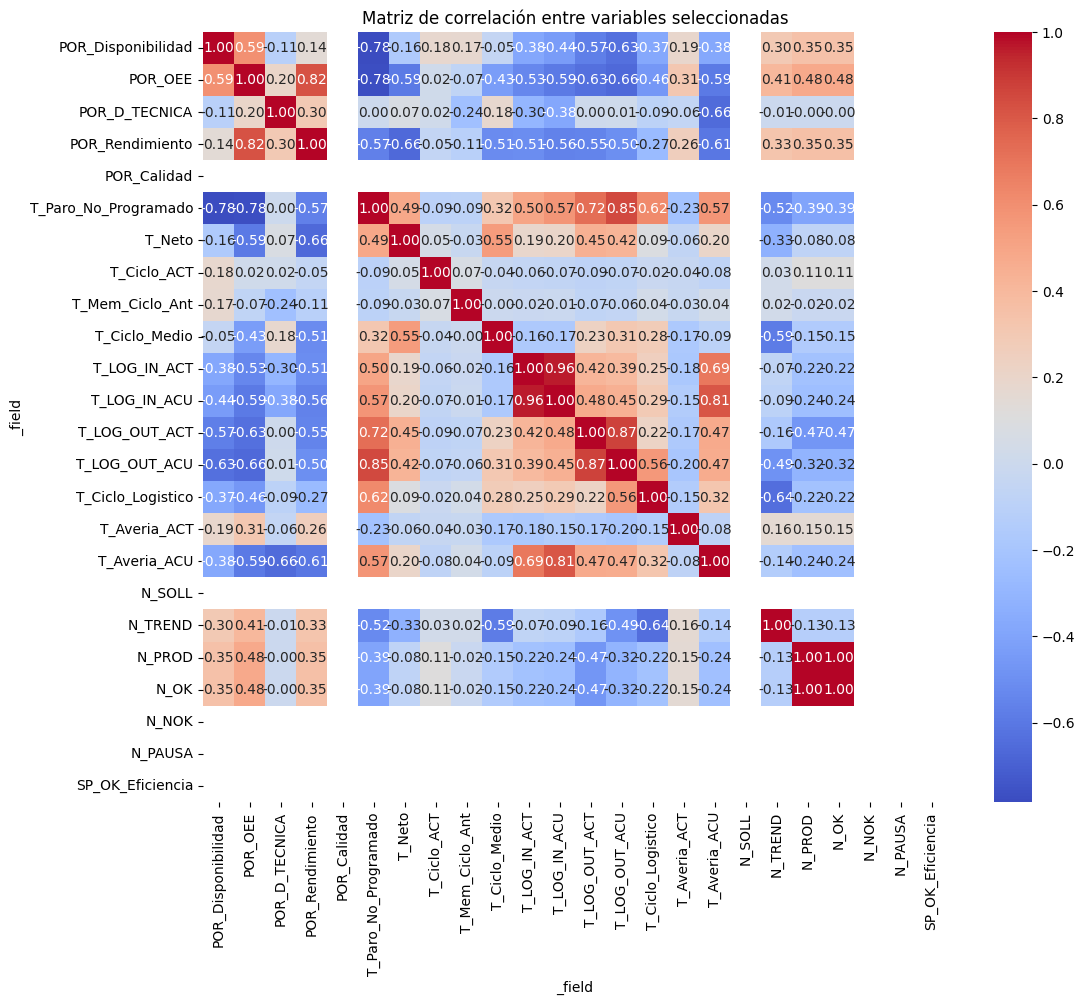

_field,POR_Disponibilidad,POR_OEE,POR_D_TECNICA,POR_Rendimiento,POR_Calidad,T_Paro_No_Programado,T_Neto,T_Ciclo_ACT,T_Mem_Ciclo_Ant,T_Ciclo_Medio,...,T_Ciclo_Logistico,T_Averia_ACT,T_Averia_ACU,N_SOLL,N_TREND,N_PROD,N_OK,N_NOK,N_PAUSA,SP_OK_Eficiencia
count,722395.000000,722395.000000,722395.000000,722395.000000,722395.0,722395.000000,722395.000000,722395.000000,722395.000000,722395.000000,...,722395.000000,722395.000000,722395.000000,722395.0,722395.000000,722395.000000,722395.000000,722395.0,722395.0,722395.0
mean,45.078241,28.769037,96.329509,62.087602,100.0,289.696211,171.107406,2.382255,1.465802,2.022358,...,17.078432,2.191518,17.850034,118.0,214.444239,40.996881,40.996881,0.0,0.0,85.0
std,16.500104,17.421590,3.715320,33.020876,0.0,266.457301,82.916159,8.078595,1.472761,1.948914,...,45.631935,3.299658,18.854864,0.0,179.815361,44.026039,44.026039,0.0,0.0,0.0
min,0.094994,0.094368,78.468201,1.692147,100.0,0.676758,1.276855,0.000244,0.959961,1.009277,...,1.448065,0.000244,0.000977,118.0,-794.000000,0.000000,0.000000,0.0,0.0,85.0
25%,32.958733,5.822749,94.391655,16.711594,100.0,98.877930,122.404785,1.258789,1.263428,1.294147,...,3.131491,0.267334,3.613281,118.0,186.000000,0.000000,0.000000,0.0,0.0,85.0
50%,44.149681,32.000618,97.558853,75.576935,100.0,207.447266,177.452148,1.267578,1.267578,1.337717,...,3.999923,0.733398,11.717285,118.0,273.000000,21.000000,21.000000,0.0,0.0,85.0
75%,58.152332,40.875204,98.954620,90.165154,100.0,340.566406,214.461914,1.412109,1.410645,1.593295,...,21.982932,3.170898,24.725586,118.0,328.000000,82.000000,82.000000,0.0,0.0,85.0
max,93.675980,88.393852,99.999794,100.246277,100.0,1435.983398,329.981934,127.004395,50.227539,8.373262,...,1356.393555,34.589844,53.840820,118.0,328.000000,134.000000,134.000000,0.0,0.0,85.0


In [20]:
# Selección de variables clave para análisis descriptivo y detección de outliers
variables_interes = [
    'POR_Disponibilidad', 'POR_OEE', 'POR_D_TECNICA', 'POR_Rendimiento', 'POR_Calidad',
    'T_Paro_No_Programado', 'T_Neto', 'T_Ciclo_ACT', 'T_Mem_Ciclo_Ant', 'T_Ciclo_Medio', 
    'T_LOG_IN_ACT', 'T_LOG_IN_ACU', 'T_LOG_OUT_ACT', 'T_LOG_OUT_ACU', 'T_Ciclo_Logistico', 
    'T_Averia_ACT', 'T_Averia_ACU', 'N_SOLL', 'N_TREND', 'N_PROD', 'N_OK', 'N_NOK', 
    'N_PAUSA', 'SP_OK_Eficiencia'
]

# Filtrar solo las columnas de interés
df_subset = df_oee[variables_interes]

# Análisis descriptivo
descripcion = df_subset.describe()

# Graficar histogramas para ver distribución de cada variable
fig, axes = plt.subplots(len(variables_interes)//4 + 1, 4, figsize=(16, 20))
axes = axes.flatten()
for i, col in enumerate(variables_interes):
    sns.histplot(df_subset[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel('')

# Ajuste de espaciado
plt.tight_layout()
plt.show()

# Graficar boxplots para observar outliers
fig, axes = plt.subplots(len(variables_interes)//4 + 1, 4, figsize=(16, 20))
axes = axes.flatten()
for i, col in enumerate(variables_interes):
    sns.boxplot(data=df_subset[col].dropna(), ax=axes[i])
    axes[i].set_title(f'Outliers de {col}')
    axes[i].set_xlabel('')

# Ajuste de espaciado
plt.tight_layout()
plt.show()

# Matriz de correlación para analizar relaciones entre variables
plt.figure(figsize=(12, 10))
correlacion = df_subset.corr()
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Matriz de correlación entre variables seleccionadas')
plt.show()

descripcion


Analizando la matriz de correlaciones y la tabla de describe. Rápidamente se obtienen las siguientes conclusiones:
- No tiene sentido analizar las variables de N_NOK, N_PAUSA, SP_OK_EFICIENCIA, N_SOLL y POR_CALIDAD. Son variables que carecen de variabilidad. Por ejemplo, la mesa de trabajo a estudiar no determina si el ciclo es OK/NOK, por lo tanto, las variables relacionadas con la calidad de la estación. Por otro lado, variables como N_PAUSA no tienen ningún valor válido, puede ser que no se escriban en el PLC o no se estén calculando correctamente.
- Analizando la matriz también se observa que N_PROD y NOK tienen una relación directa. Esto nos sugiere eliminar una de las dos para así reducir la dimensionalidad de nuestro dataset --> N_OK = N_PROD
- Ocurre algo semejante con la variable de tiempos logísticos de entrada. Cuentan con un 0.96 de relación positiva, por lo que podríamos prescindir de una de ellas.
- N_SOLL de momento no la vamos a suprimir ya que nos sirve para comparar valores de producción. Debido a que significa la producción objetivo del día
- Del análisis realizado hasta ahora se deciden suprimir las variables siguientes:
    - N_NOK
    - T_LOG_IN_ACU
    - N_OK
    - N_PAUSA
    - SP_OK_EFICIENCIA
    - POR_CALIDAD
    

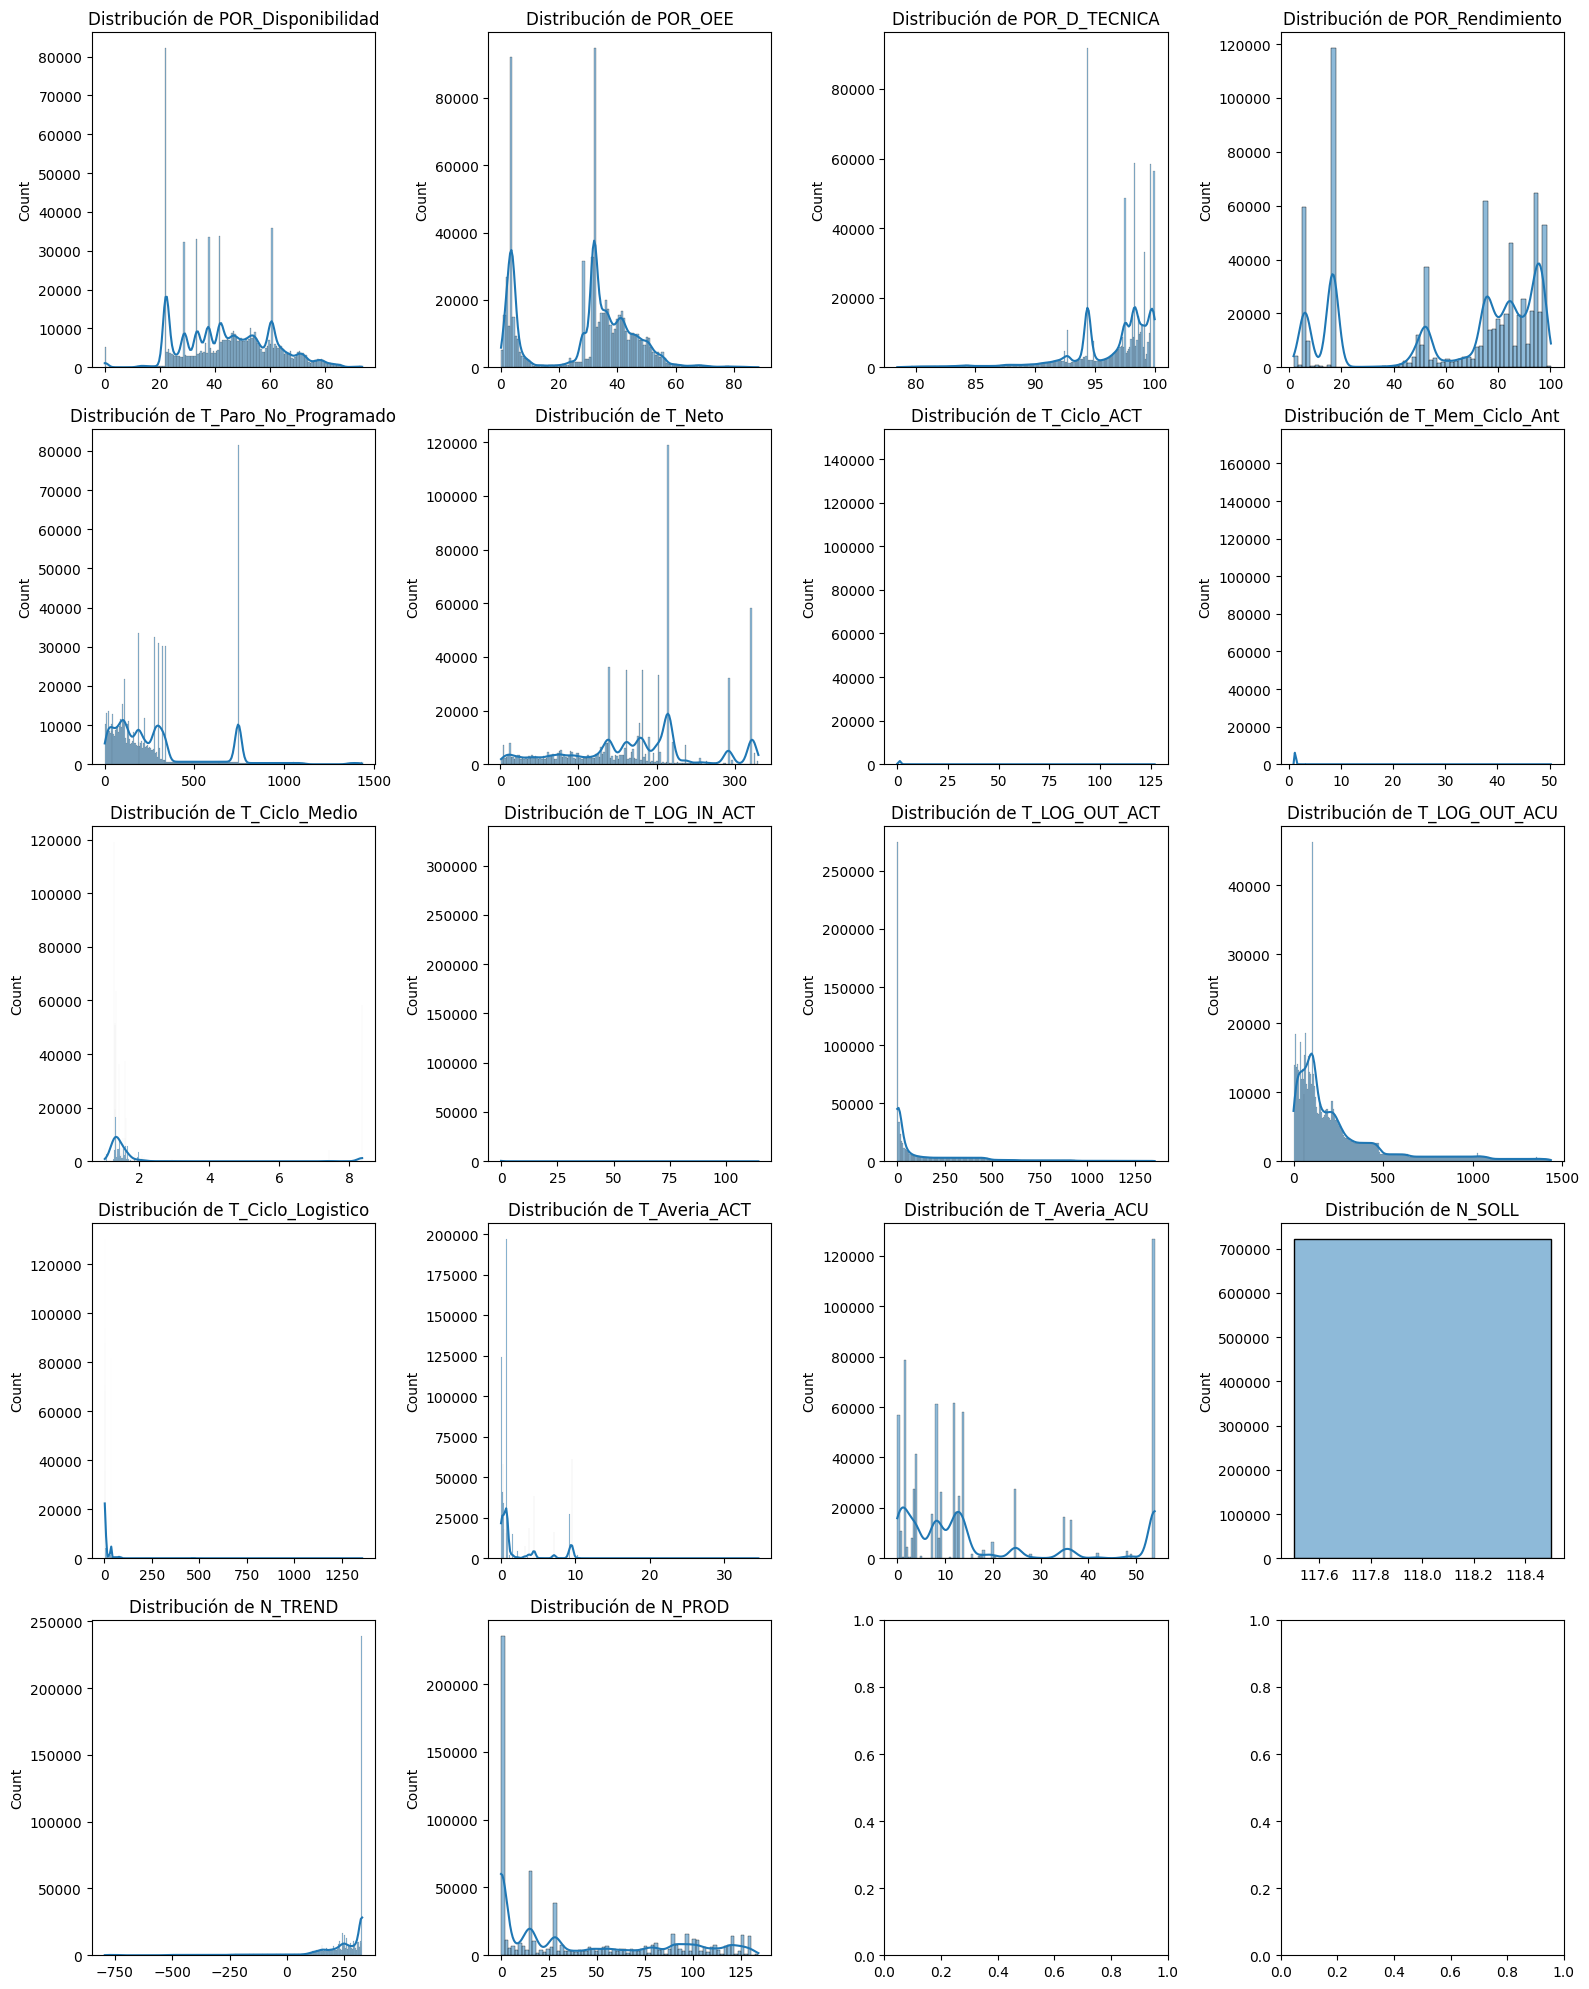

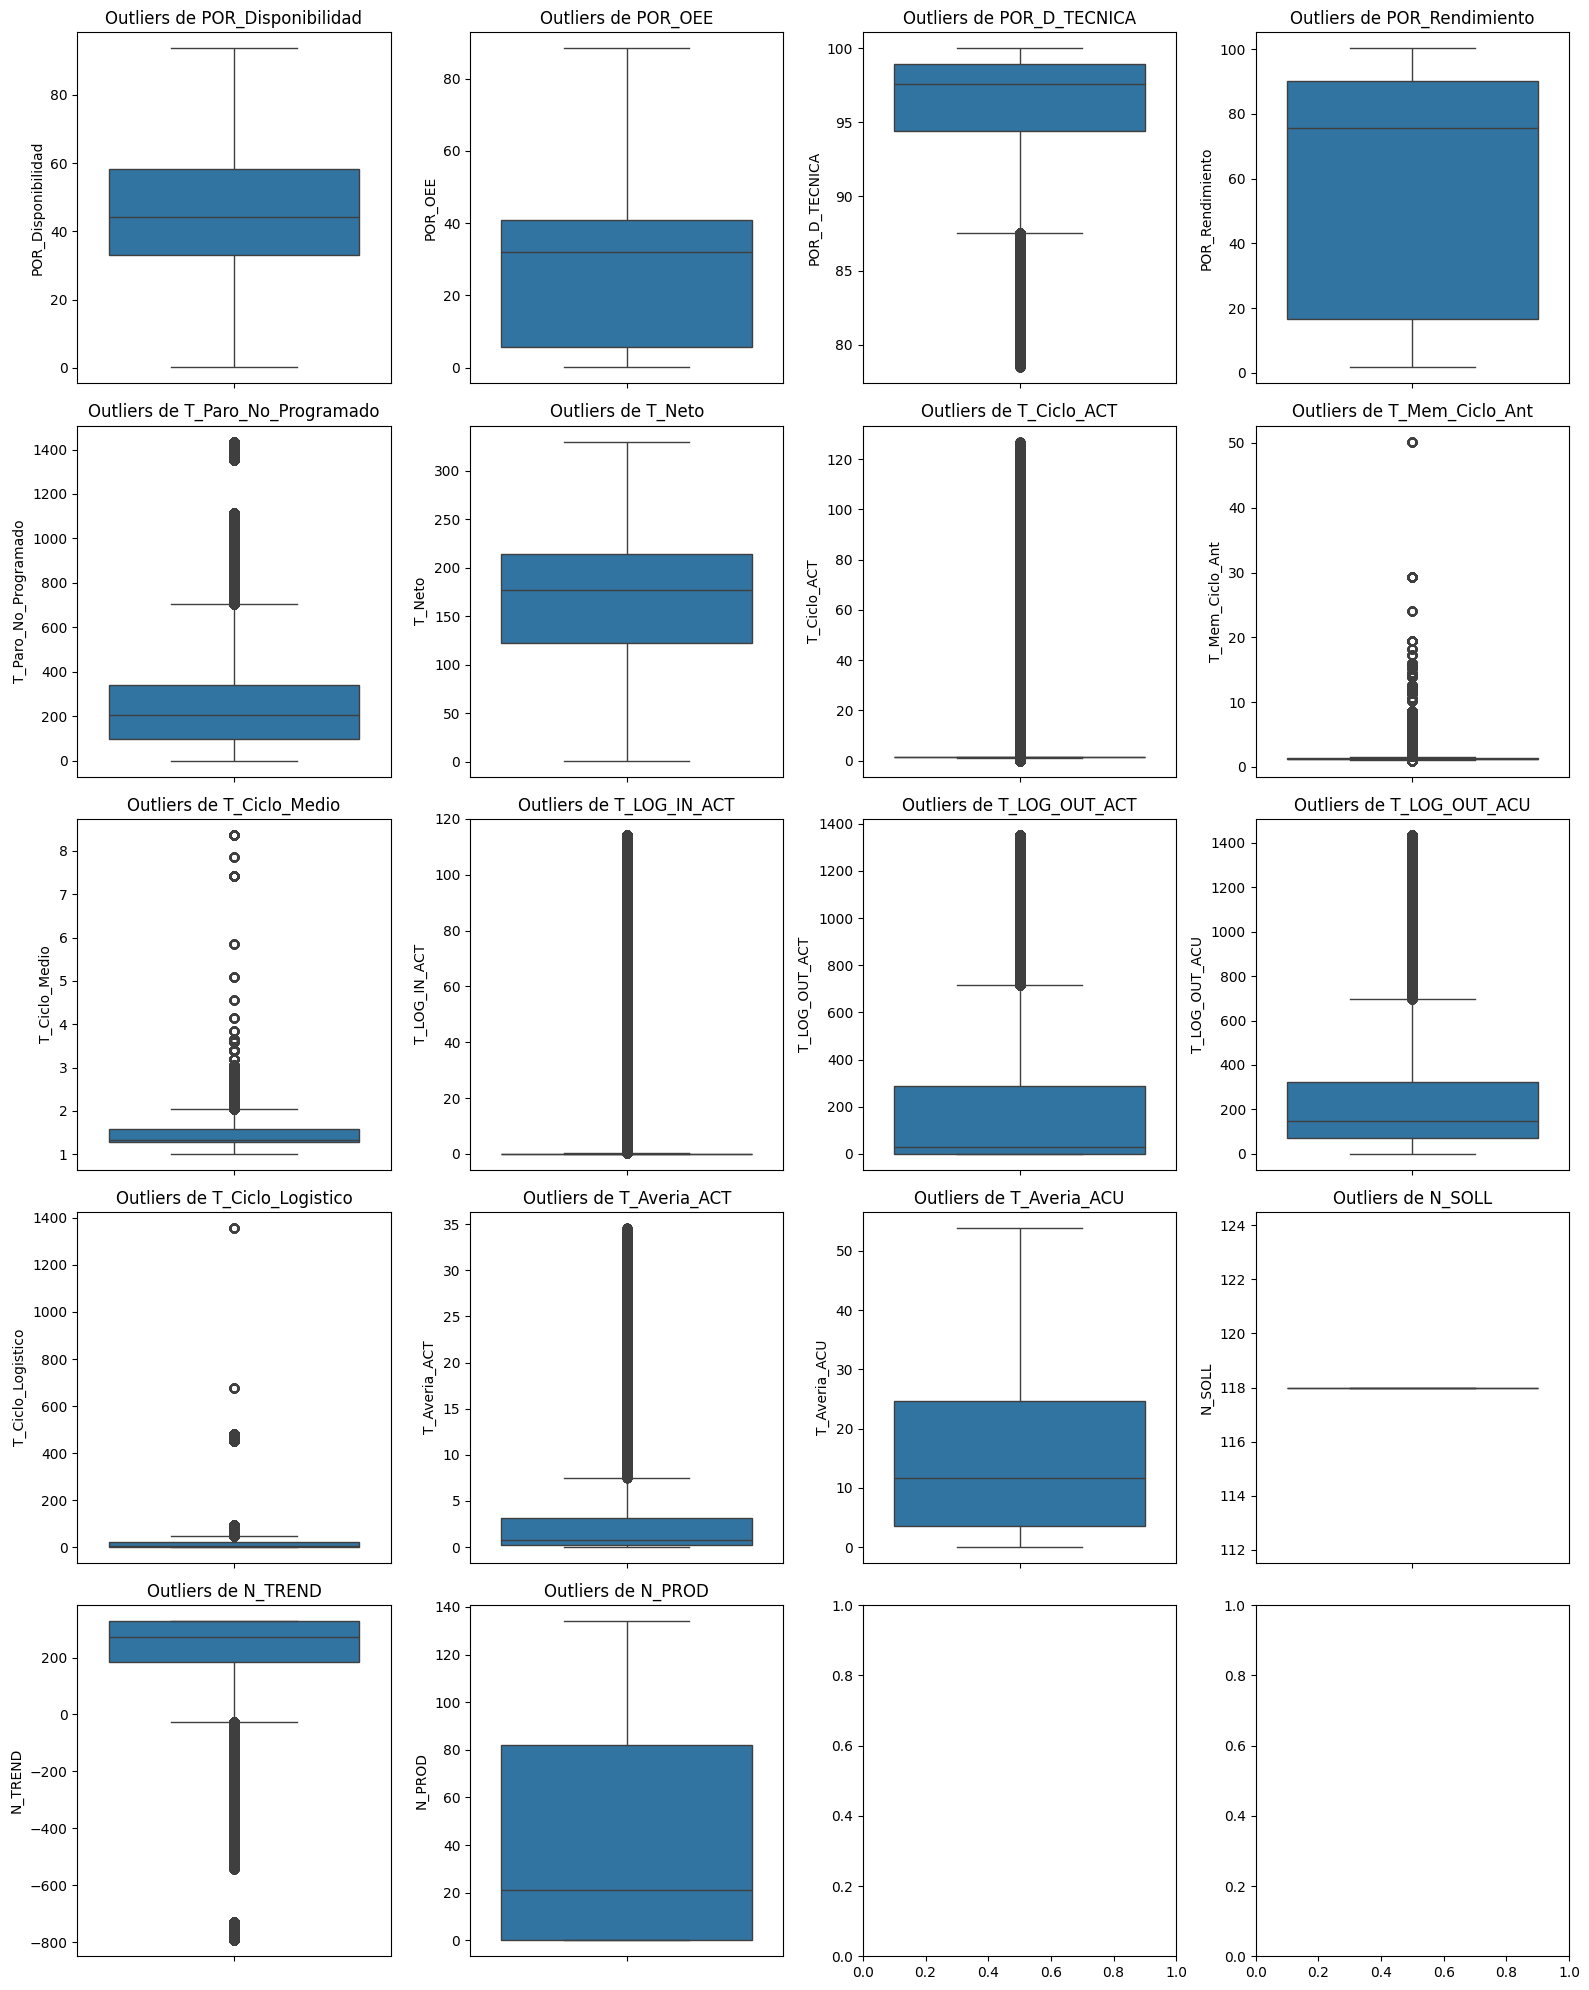

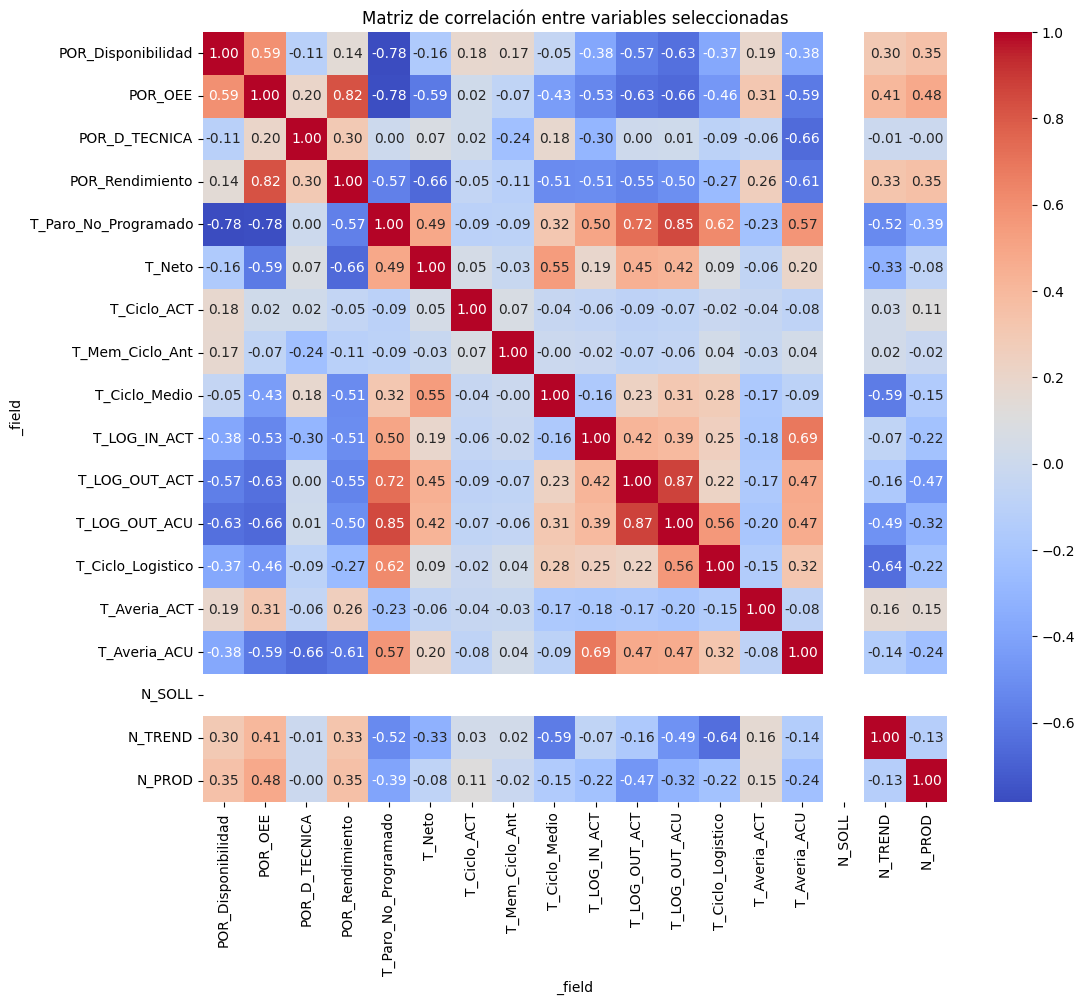

In [22]:
# Selección de variables clave para análisis descriptivo y detección de outliers
variables_interes = [
    'POR_Disponibilidad', 'POR_OEE', 'POR_D_TECNICA', 'POR_Rendimiento',
    'T_Paro_No_Programado', 'T_Neto', 'T_Ciclo_ACT', 'T_Mem_Ciclo_Ant', 'T_Ciclo_Medio', 
    'T_LOG_IN_ACT', 'T_LOG_OUT_ACT', 'T_LOG_OUT_ACU', 'T_Ciclo_Logistico', 
    'T_Averia_ACT', 'T_Averia_ACU', 'N_SOLL', 'N_TREND', 'N_PROD'
]

# Filtrar solo las columnas de interés
df_subset = df_oee[variables_interes]

# Graficar histogramas para ver distribución de cada variable
fig, axes = plt.subplots(len(variables_interes)//4 + 1, 4, figsize=(16, 20))
axes = axes.flatten()
for i, col in enumerate(variables_interes):
    sns.histplot(df_subset[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel('')

# Ajuste de espaciado
plt.tight_layout()
plt.show()

# Graficar boxplots para observar outliers
fig, axes = plt.subplots(len(variables_interes)//4 + 1, 4, figsize=(16, 20))
axes = axes.flatten()
for i, col in enumerate(variables_interes):
    sns.boxplot(data=df_subset[col].dropna(), ax=axes[i])
    axes[i].set_title(f'Outliers de {col}')
    axes[i].set_xlabel('')

# Ajuste de espaciado
plt.tight_layout()
plt.show()

# Matriz de correlación para analizar relaciones entre variables
plt.figure(figsize=(12, 10))
correlacion = df_subset.corr()
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Matriz de correlación entre variables seleccionadas')
plt.show()